In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp
import treecorr

def display_param(param_string):
    """
    Displaying our values every time. (slightly shady)
    """
    param_value = eval(param_string)
    print(f"{param_string} = {param_value}")
    return

# same size as in latex
font_factor = 10.88 / 12
main_font_size = 12 * font_factor
axes_font_size = 10 * font_factor

from matplotlib_stylesheet import group05_style_sheet, style_rest, set_size
plt.rcParams.update(group05_style_sheet)

# custom colormap
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm
cmap_name = "cmap_healpy"
colors = ["#F5F5F5", "#fc8d62"]
n_bin = 2
cmap_healpy = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bin)
boundaries = [0, 0.5, 1]
norm = BoundaryNorm(boundaries, cmap_healpy.N)

# P2.1 : Working and plotting data on the celestial sphere with healpy

In this exercise you will generate all-sky maps for different NSIDE parameters. 

#### For NSIDE = $2^0$ make an array of size npix with np.arange

 - Use the equation provided in the lab manual to first compute the number of pixels (npix) for the given NSIDE. 
 - Compare your result the output of hp.nside2npix command 
 
 The first few functions are already written to help you get started!

In [2]:
NSIDE = 1
npix_healpy = hp.nside2npix(nside=NSIDE)
print(npix_healpy)

12


In [3]:
npix = 12 * NSIDE**2 # write the relevant equation from the manual and compare the value of npix with npix_healpy above
print(npix)

12


 - Use np.arange to create an array of size npix and print it

In [4]:
map_arr = np.arange(npix)
print(map_arr)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


#### Visualize the array in healpy map format using the function hp.mollview (https://healpy.readthedocs.io/en/latest/generated/healpy.visufunc.mollview.html).

findfont: Font family ['Noto Sans Math'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Noto Sans Math'] not found. Falling back to DejaVu Sans.


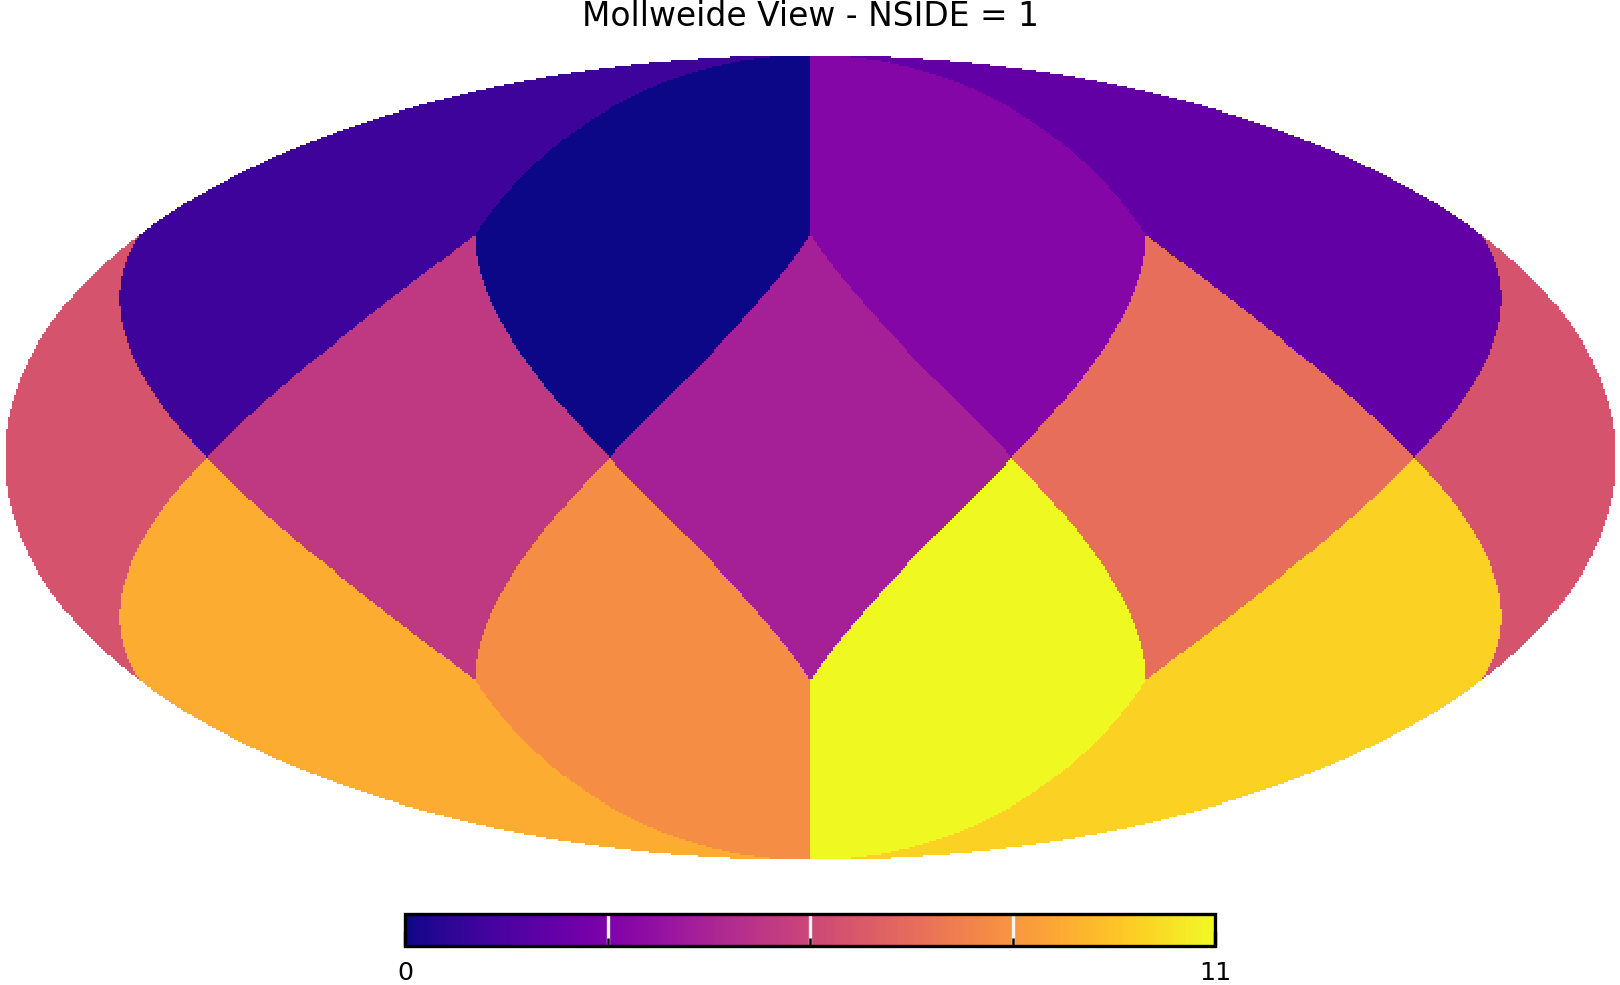

In [5]:
fig, ax = plt.subplots(figsize=set_size(), dpi=300)
ax.axis("off")
hp.mollview(map_arr, cmap="plasma", fig=fig, sub=(1,1,1),
            title="Mollweide View - NSIDE = 1")
plt.savefig("./figures/P21_single.svg")
plt.show()

For NSIDE = $2^0$, notice the colour scheme of the pixels (from dark to light pixels) --> see how the pixels are arranged. Try to figure out which one is the first and which one is the last pixel. For example: zeroth index starts at the north pole left to the meridian.

#### Calculate the $\theta_{pixel}$ for this NSIDE using hp.nside2pixarea (https://healpy.readthedocs.io/en/latest/generated/healpy.pixelfunc.nside2pixarea.html) and the relevant equation provided in the lab manual

In [6]:
# size of each pixel in square radians and square degrees

size_pix_rad = hp.nside2pixarea(1)
display_param("size_pix_rad")
size_pix_deg = hp.nside2pixarea(1, degrees=True)
display_param("size_pix_deg")
delta_pix_deg = np.sqrt(size_pix_deg)
delta_pix_rad = np.sqrt(size_pix_rad)
print(f"delta_pix_deg = {delta_pix_deg}")
print(f"delta_pix_rad = {delta_pix_rad}")

size_pix_rad = 1.0471975511965976
size_pix_deg = 3437.746770784939
delta_pix_deg = 58.63230142835039
delta_pix_rad = 1.0233267079464885


#### Repeat all the above exercises for NSIDE = $2^1, 2^2, 2^3, 2^{11}$. Visualize the changes at map level and also compute the number of pixels and pixel scale for the different NSIDE

---------------------------------------------
NSIDE = 2
npix_lab_2 = 48
size_pix_deg = 859.4366926962348
size_pix_rad = 0.2617993877991494
delta_pix_deg = 29.316150714175194
delta_pix_rad = 0.5116633539732443
---------------------------------------------
NSIDE = 4
npix_lab_4 = 192
size_pix_deg = 214.8591731740587
size_pix_rad = 0.06544984694978735
delta_pix_deg = 14.658075357087597
delta_pix_rad = 0.2558316769866221
---------------------------------------------
NSIDE = 8
npix_lab_8 = 768
size_pix_deg = 53.714793293514674
size_pix_rad = 0.016362461737446838
delta_pix_deg = 7.3290376785437985
delta_pix_rad = 0.12791583849331106
---------------------------------------------
NSIDE = 2048
npix_lab_2048 = 50331648
size_pix_deg = 0.0008196227004015301
size_pix_rad = 2.4967135219492856e-07
delta_pix_deg = 0.028629053431811713
delta_pix_rad = 0.0004996712441144963


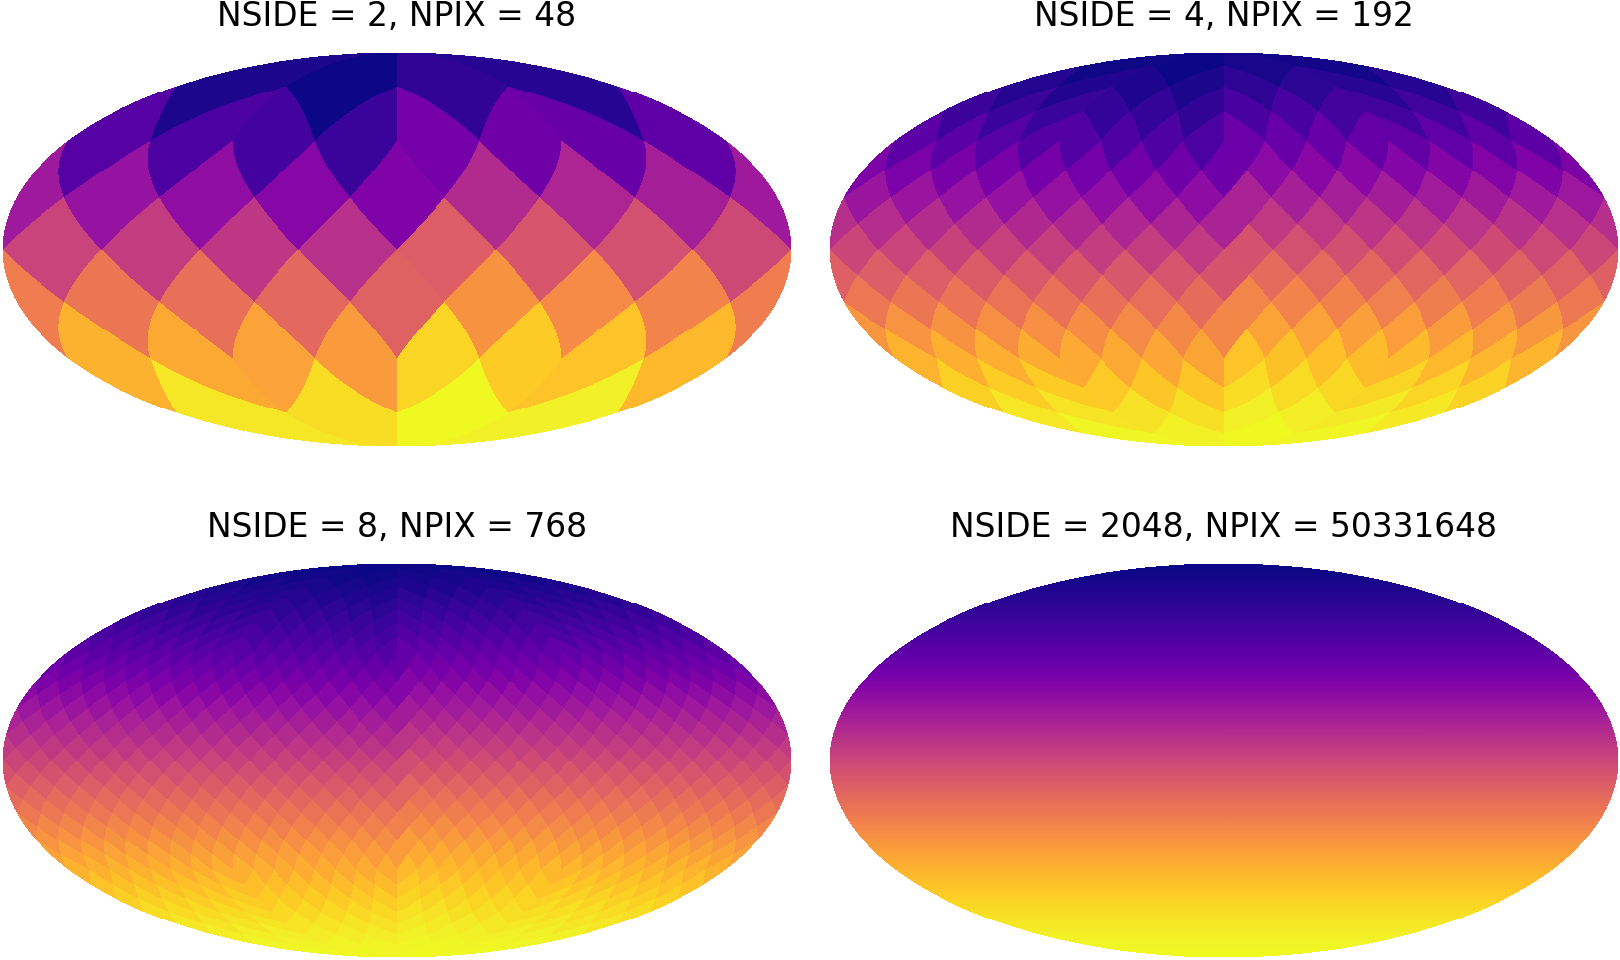

In [7]:
NSIDE_array = [2**1, 2**2, 2**3, 2**11]

def try_nsides(NSIDE, return_map=False, display_values=True):
    
    if display_values:
        print("---------------------------------------------")
        print(f"NSIDE = {NSIDE}")

    # how the lab manual gets npix
    npix = 12 * NSIDE**2
    print(f"npix_lab_{NSIDE} = {npix}")

    # get array
    map_arr = np.arange(npix)

    size_pix_rad = hp.nside2pixarea(NSIDE)
    size_pix_deg = hp.nside2pixarea(NSIDE, degrees=True)
    delta_pix_deg = np.sqrt(size_pix_deg)
    delta_pix_rad = np.sqrt(size_pix_rad)
    if display_values:
        print(f"size_pix_deg = {size_pix_deg}")
        print(f"size_pix_rad = {size_pix_rad}")
        print(f"delta_pix_deg = {delta_pix_deg}")
        print(f"delta_pix_rad = {delta_pix_rad}")

    # for the next exercise
    if return_map:
        return map_arr, npix
    else:
        return  

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=set_size(),
                        dpi=300)
axs = axs.flat

for i, curr_nside in enumerate(NSIDE_array):
    curr_map, curr_pix = try_nsides(curr_nside, return_map=True)
    # and display the map
    axs[i].axis("off")
    hp.mollview(curr_map,
                title = fr"NSIDE = {curr_nside}, NPIX = {curr_pix}",
                sub=(2, 2, i + 1), fig=fig, cmap="plasma", cbar=False)
    axs[i].title.set_fontsize(8)

plt.savefig("./figures/P21_overview.svg")
plt.show()

**For our lab we will be working with NSIDE = $2^{11}$. This is the same resolution as the weak lensing shear maps we will use from the Takahashi (T17) simulations.**

# P2.2 : Extracting circular patches on the sphere with healpy

In this exercise you will query a circular patch (disc) with a certain radius at a specified position on the NSIDE = $2^{11}$ map that you have created above. In order to do so:

- First specify the center of the patch in angular spherical coordinates and the radius of the patch (use 2.5 degrees as the angular radius of the patch). To achieve this, use the function hp.ang2vec(theta, phi) to get the normalised unit vector of the center of the patch at the angular spherical coordinates theta and phi of the patch center.

In [8]:
full_NSIDE = 2**11
full_map, _ = try_nsides(NSIDE=full_NSIDE, return_map=True)
cen_unit_vec = hp.ang2vec(np.pi/2,0)

---------------------------------------------
NSIDE = 2048
npix_lab_2048 = 50331648
size_pix_deg = 0.0008196227004015301
size_pix_rad = 2.4967135219492856e-07
delta_pix_deg = 0.028629053431811713
delta_pix_rad = 0.0004996712441144963


- Then query a circular disc of desired radius (in radians) using the function hp.query_disc(NSIDE, vec=vec, radius=np.radians(radius_patch)) . This will return all the pixel indices of the above map which fall within the disc

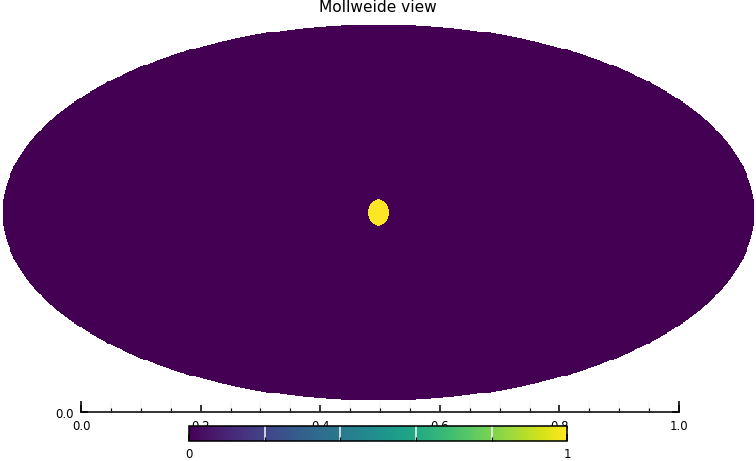

In [9]:
circ_disc = hp.query_disc(full_NSIDE, vec=cen_unit_vec,
                          radius = np.radians(5))

# set all values at pixels (indices of array) [circ_disk] to 1
full_map_w_disk = np.copy(full_map)
full_map_w_disk[:] = 0.1
full_map_w_disk[circ_disc] = 1

fig, ax = plt.subplots(figsize=set_size())
hp.mollview(full_map_w_disk, fig=fig, sub=(1,1,1))

- Now assign a value of 1 to all these disc pixels and visualise the corresponding map


- On the map draw 5 separate non-overlapping circular patches (use a loop) and visualize the final map

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


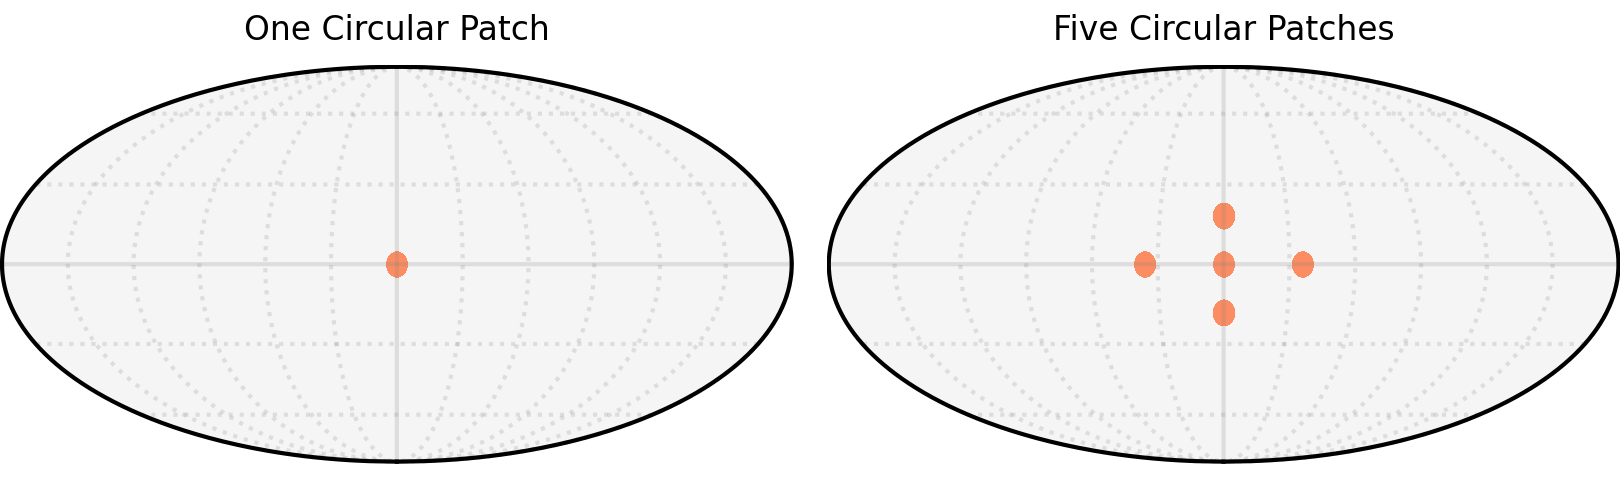

In [10]:
def subtract_circular_patch(curr_map, theta, phi):
    cen_unit_vec = hp.ang2vec(theta, phi)
    curr_circ = hp.query_disc(full_NSIDE, vec=cen_unit_vec, radius=np.radians(5))
    curr_map[curr_circ] = 1
    return curr_map

curr_map = np.copy(full_map)
curr_map[:] = 0.1

# positions for all circular patches
thetas = [np.pi/2, np.pi/2, np.pi/2, np.pi/2-0.1*np.pi, np.pi/2+0.1*np.pi]
phis = [0, 0.2*np.pi, 2*np.pi-0.2*np.pi, 0, 0]

for curr_theta, curr_phi in zip(thetas, phis):
    curr_map = subtract_circular_patch(curr_map=curr_map, theta=curr_theta, phi=curr_phi)

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=set_size(height_factor=0.4), dpi=300)

hp.mollview(full_map_w_disk, sub=(1, 2, 1), fig=fig, cmap=cmap_healpy,
            cbar=False,
            title="One Circular Patch")
hp.mollview(curr_map, sub=(1, 2, 2), fig=fig, cmap=cmap_healpy, cbar=False,
            title="Five Circular Patches")
hp.graticule(alpha=0.2, color="grey")

axs[0].axis("off")
axs[0].title.set_visible(False)
axs[1].axis("off")
axs[1].title.set_fontsize(8)

plt.savefig("./figures/P22_patches_demonstration.svg")
plt.show()

# P2.3: Importing and checking the simulated weak lensing shear maps from Takahashi simulations (T17)

In this exercise you will import the publicly available Takahashi (T17) simulation weak lensing shear ($\gamma_1$ and $\gamma_2$ components) as healpix maps 

For details about the simulation, refer to: http://cosmo.phys.hirosaki-u.ac.jp/takahasi/allsky_raytracing/). For the lab we will be using the shear maps at 2 different source redshifts at $z_{s,1}$ = 0.5739 and $z_{s,2}$ = 1.0334. The maps are already downloaded in the directory you are working in. We will initially start with only the $z_{s,1}$ map

- Load (use hp.read_map) both the $\gamma_1$ and $\gamma_2$ components of the shear map at source redshift $z_{s,1}$ and visualize them. Check how many pixels are there in each shear map and verify that it corresponds to NSIDE = $2^{11}$.

In [11]:
path = "./T17_simulation_WL_shear_data/allskymap_NSIDE2048_r000_zsource_0.5739"
gamma1_z1 = hp.read_map(f"{path}_gamma1.fits")
gamma2_z1 = hp.read_map(f"{path}_gamma2.fits")

path = "./T17_simulation_WL_shear_data/allskymap_NSIDE2048_r000_zsource_1.0334"
gamma1_z2 = hp.read_map(f"{path}_gamma1.fits")
gamma2_z2 = hp.read_map(f"{path}_gamma2.fits")

# are they all the same size?
print((len(gamma1_z1) == len(gamma2_z1) == 12*(2**11)**2))

True


0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


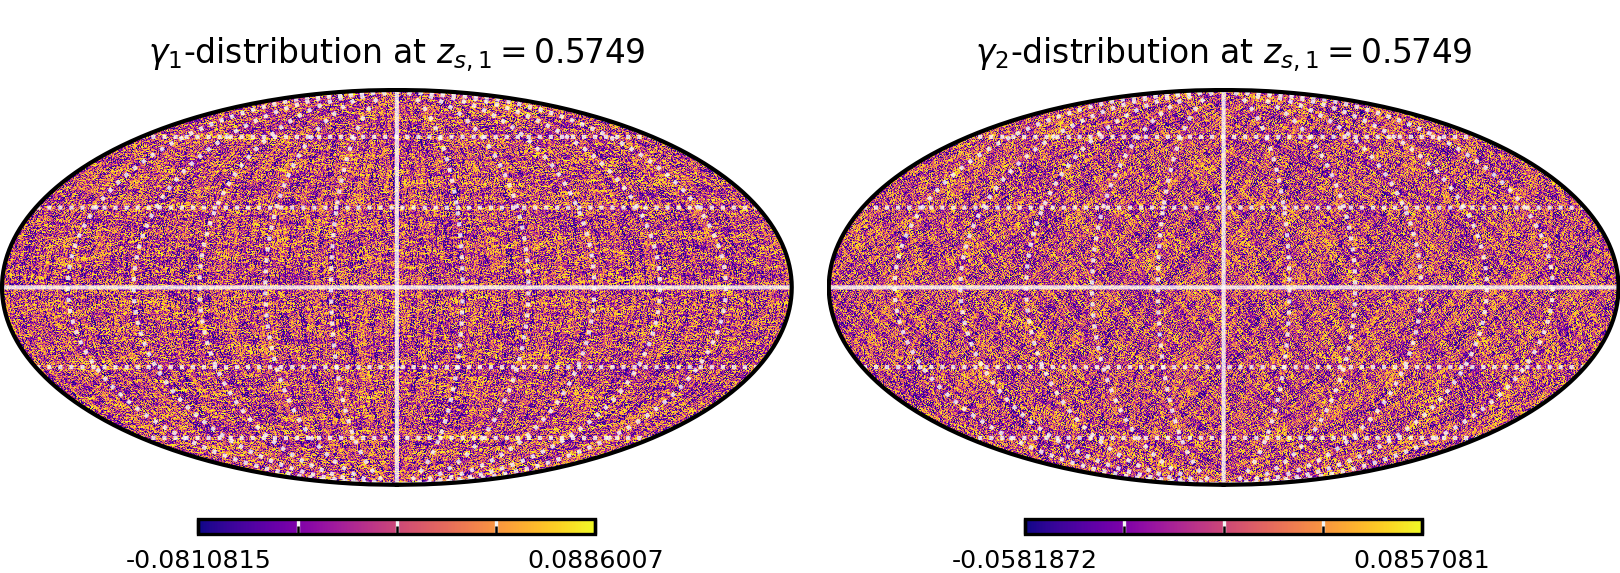

In [17]:
# visualize shear fields for lower redshift z_s_1

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=set_size(height_factor=0.4), dpi=300)

hp.mollview(gamma1_z1, norm="histo", cmap="plasma",
            sub=(1, 2, 1), fig=fig,
            title=r"$\gamma_1$-distribution at $z_{s,1}=0.5749$")
hp.mollview(gamma2_z1, norm="histo", cmap="plasma",
            sub=(1, 2, 2), fig=fig,
            title=r"$\gamma_2$-distribution at $z_{s,1}=0.5749$")

hp.graticule(alpha=0.8, color="white")

axs[0].axis("off")
axs[0].title.set_fontsize(8)
axs[1].axis("off")
axs[1].title.set_fontsize(8)

plt.savefig("./figures/P23_visualize_shear_zs1.svg")
plt.show()

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


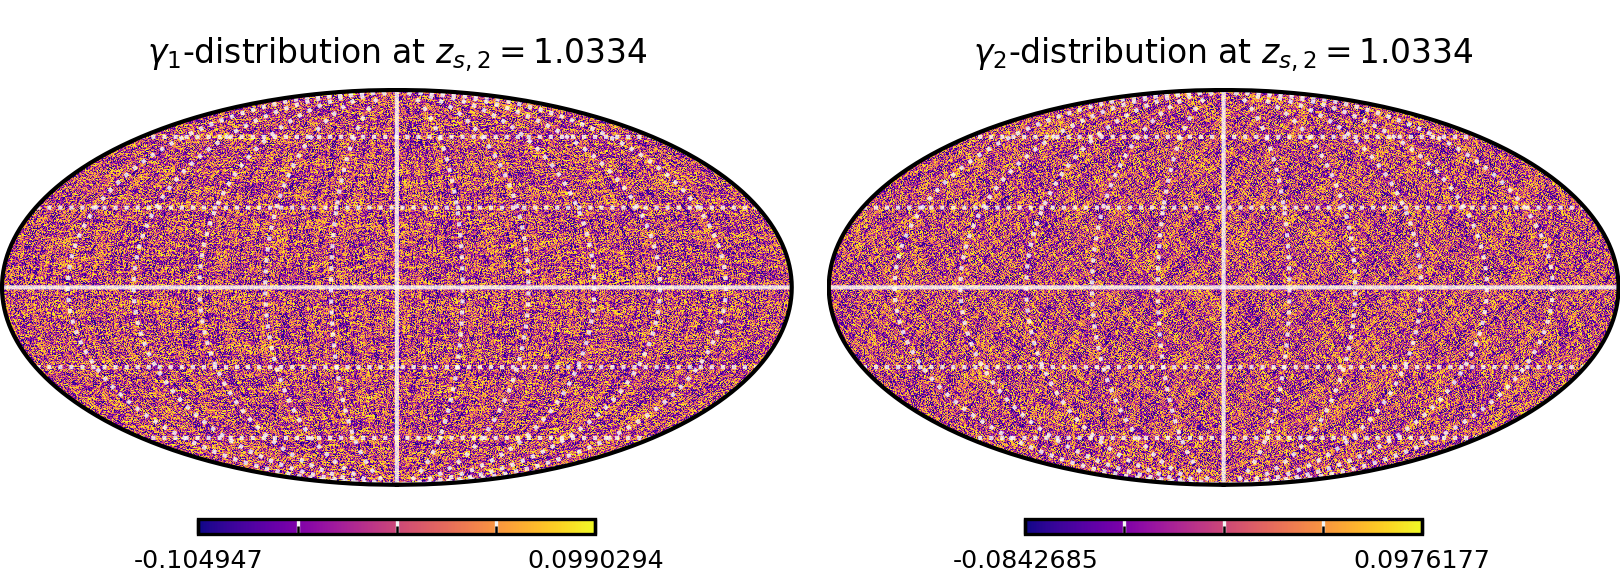

In [16]:
# visualize shear fields for higher redshift z_s_2

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=set_size(height_factor=0.4), dpi=300)

hp.mollview(gamma1_z2, norm="histo", cmap="plasma",
            sub=(1, 2, 1), fig=fig,
            title=r"$\gamma_1$-distribution at $z_{s,2}=1.0334$")
hp.mollview(gamma2_z2, norm="histo", cmap="plasma",
            sub=(1, 2, 2), fig=fig,
            title=r"$\gamma_2$-distribution at $z_{s,2}=1.0334$")

hp.graticule(alpha=0.8, color="white")

axs[0].axis("off")
axs[0].title.set_fontsize(8)
axs[1].axis("off")
axs[1].title.set_fontsize(8)

plt.savefig("./figures/P23_visualize_shear_zs2.svg")
plt.show()

# P2.4: Working with *treecorr*: package to compute shear two-point correlation functions (2PCFs)

In order to measure the shear 2PCFs $\xi_{\pm}$ from the $\gamma_1$ and $\gamma_2$ maps at source redshift $z_{s,1}$ you have visualized above you will use the publicly available code package treecorr (https://rmjarvis.github.io/TreeCorr/_build/html/index.html). 

Treecorr has many functionalities (computing different kinds of 2-point correlations and also 3-point correlations). As we are interested in computing specifically the shear-shear 2PCF we will use the GGCorrelation module. Read  up about it in https://rmjarvis.github.io/TreeCorr/_build/html/gg.html

- Firstly, treecorr needs access to the shear $\gamma_1$ and $\gamma_2$ data in the form of the  values and the associated ra and dec of the shear pixels. Use the pixel indices of one of the circular discs you had extracted in P2.2, compute the ra and dec of those pixels using the function provided below
- Print out the gamma1 and gamma2 values of these extracted pixels

In [253]:
def pixel2RaDec(pixel_indices, NSIDE):
    theta, phi = hp.pixelfunc.pix2ang(NSIDE, pixel_indices, nest=False)
    ra = phi
    dec = np.pi/2.0-theta
    return ra, dec

# defining the disk again
cen_unit_vec = hp.ang2vec(np.pi/2, 0)
new_circ = hp.query_disc(2**11, vec=cen_unit_vec,
                         radius = np.radians(2.5))

# getting ra and dec of the disc pixels
ra_dec_array = [pixel2RaDec(i, full_NSIDE) for i in new_circ]
ra_array = [value[0] for value in ra_dec_array]
dec_array = [value[1] for value in ra_dec_array]

# gamma values only for the disc
gamma1_z1_circ = gamma1_z1[new_circ]
gamma2_z1_circ = gamma2_z1[new_circ]

gamma1_z1_circ, len(gamma1_z1_circ), gamma2_z1_circ, len(gamma2_z1_circ),

(array([ 0.0015626 ,  0.00087705,  0.0007107 , ..., -0.00353642,
         0.00309938,  0.00241085], dtype=float32),
 23948,
 array([0.00466651, 0.00147077, 0.00316822, ..., 0.0007352 , 0.00786598,
        0.0021285 ], dtype=float32),
 23948)

- Create a treecorr catalog (use https://rmjarvis.github.io/TreeCorr/_build/html/catalog.html) which contains the ra, dec, gamma1, gamma2, ra_units and dec_units of those extracted pixels. IMPORTANT: You will also need to set the flip_g1=True in the catalog (due to the convention adopted in the Takhashi simulation) 

In [257]:
cata = treecorr.Catalog(ra=ra_array, dec=dec_array, g1=gamma1_z1_circ,
                        g2=gamma2_z1_circ, flip_g1=True, ra_units="rad",
                        dec_units="rad")

# scaling the values from arcminutes to rad to have right units
minimum = 5 * (np.pi / 180 / 60)
maximum = 140 * (np.pi / 180 / 60)

ggcorr = treecorr.GGCorrelation(nbins=20, min_sep=minimum, 
                                max_sep=maximum)
ggcorr.process(cata)

p24_ggcorr = ggcorr

- Finally, in order to compute the $\xi_{\pm}$ shear 2PCFs, insert the catalog you have created above into the GG instance using the function process().

- Call the methods xip and xim of the treecorr GG instance to get the output of the correlation values. Plot them against the angular bins (which you can get from the nominal bin centres, rnom).

0.0 180.0 -180.0 180.0


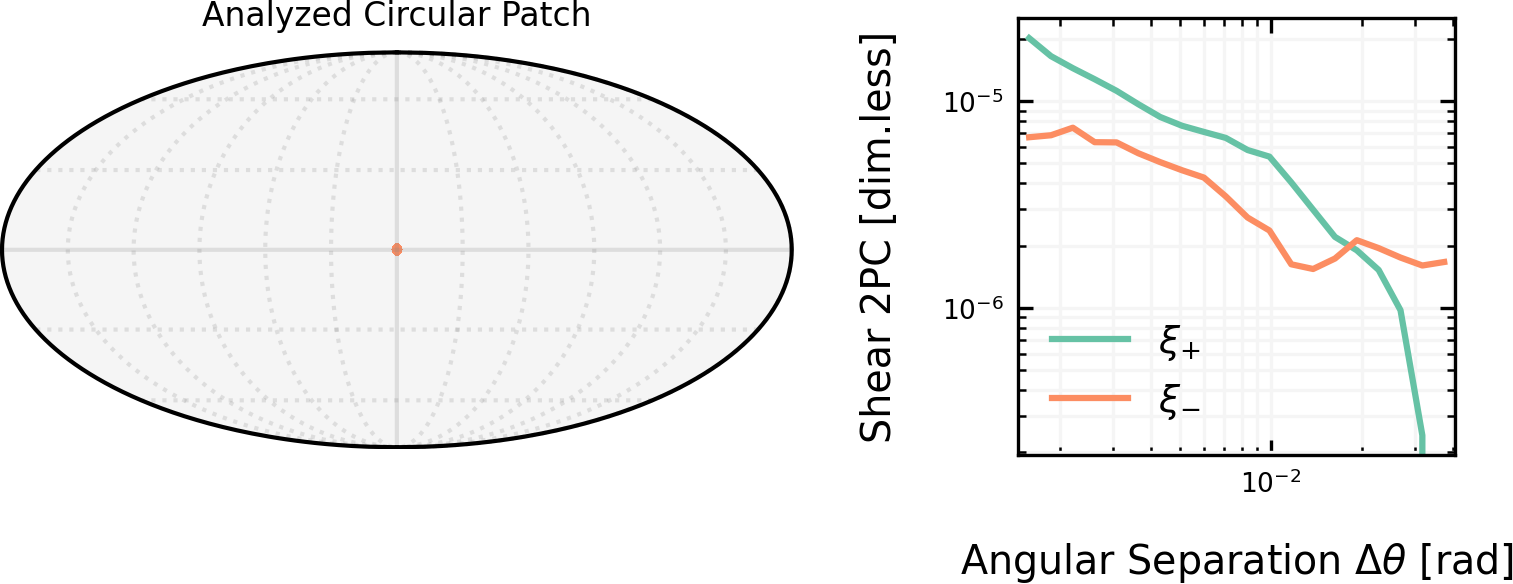

In [259]:
fig, axs = plt.subplots(figsize=set_size(height_factor=0.35), dpi=300,
                        ncols=2, nrows=1,
                        gridspec_kw={'width_ratios': [2,1.2]})

# Plotting the map with one dot
def subtract_circular_patch(curr_map, theta, phi):
    cen_unit_vec = hp.ang2vec(theta, phi)
    curr_circ = hp.query_disc(full_NSIDE, vec=cen_unit_vec,
                              radius=np.radians(2.5))
    curr_map[curr_circ] = 1
    return curr_map
curr_map = np.copy(full_map)
curr_map[:] = 0.1
curr_map = subtract_circular_patch(curr_map=curr_map, theta=np.pi/2,
                                   phi=0)
hp.mollview(curr_map, sub=(1, 2, 1), fig=fig, cmap=cmap_healpy,
            cbar=False,
            title="Analyzed Circular Patch")
hp.graticule(alpha=0.2, color="grey")
axs[0].axis("off")
axs[0].title.set_fontsize(8)

# plotting the shear 2PCF
axs[1].plot(p24_ggcorr.rnom, p24_ggcorr.xip, label=r"$\xi_{+}$")
for _ in range(3):
    next(ax._get_lines.prop_cycler)
axs[1].plot(p24_ggcorr.rnom, p24_ggcorr.xim, label=r"$\xi_{-}$")
axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].tick_params(axis='both', labelsize=10.88/12*7)
axs[1].set_xlim(minimum, maximum)
axs[1].set_xlabel(r"Angular Separation $\Delta\theta$ [rad]",
              fontsize=9.5)
axs[1].set_ylabel(r"Shear 2PC [dim.less]",
              fontsize=9.5)
axs[1].legend()

plt.savefig("./figures/P24_2pcf_one_patch.svg")
plt.show()

# P2.5: Computing the average shear 2PCFs in several patches in the $z_{s,1}$ map

In this exercise you will compute the shear 2PCFs within multiple patches in the $z_{s,1}$ map

- Repeat P2.4 for 100 randomly located (preferably non-overlapping) patches on the $z_{s,1}$ map; store the xip and xim computed in 15 bins using treecorr for these 100 patches in a 100x20 array (make separate arrays for xip and xim).

In [244]:
P25_map = np.copy(gamma1_z1)

# slightly changed because we need the curr_circ as_well
def subtract_circular_patch(curr_map, theta, phi, return_circ=True):
    cen_unit_vec = hp.ang2vec(theta, phi)
    curr_circ = hp.query_disc(2**11, vec=cen_unit_vec,
                              radius = np.radians(2.5))
    curr_map[curr_circ] = 1
    if return_circ:
        return curr_map, curr_circ
    return curr_map

def pixel2RaDec(pixel_indices, NSIDE):
    theta, phi = hp.pixelfunc.pix2ang(NSIDE, pixel_indices, nest=False)
    ra = phi
    dec = np.pi/2.0-theta
    return ra, dec

n_patches = 0
picked_phis, picked_thetas, xim_array_p25, xip_array_p25 = [], [], [], []
circ_indices = np.array([])
theta_cond, phi_cond = True, True

np.random.seed(314)

# we need 100 patches in total
while n_patches < 100:
    
    # random values we try out
    theta_try = np.random.uniform(0, np.pi)
    phi_try = np.random.uniform(0, 2*np.pi)

    # borders we have to check for theta
    theta_try_l = theta_try - np.radians(2.5)
    if theta_try_l < 0:
        theta_try_l += np.pi
    theta_try_h = theta_try + np.radians(2.5)
    if theta_try_h > np.pi:
        theta_try_h -= np.pi

    # borders we have to check for phi
    phi_try_l = phi_try - np.radians(2.5)
    if phi_try_l < 0:
        phi_try_l += 2*np.pi
    phi_try_h = phi_try + np.radians(2.5)
    if phi_try_h > 2*np.pi:
        phi_try_h -= 2*np.pi

    # do these values overlap with already picked ones?
    phi_cond = not(any(
        (theta_try_l <= i <= theta_try_h) for i in picked_thetas
    ))
    theta_cond = not(any(
        (phi_try_l <= i <= phi_try_h) for i in picked_phis
    ))

    # if not, then add them to the map and n_patches += 1
    if theta_cond or phi_cond:
        # update the lists of used values
        picked_thetas.append(theta_try)
        picked_phis.append(phi_try)
        # update the map and get the current indices
        P25_map, curr_circ = subtract_circular_patch(curr_map=P25_map,
                                                     theta=theta_try,
                                                     phi=phi_try,
                                                     return_circ=True)
        # add the current ra and dec to the array        
        curr_ra_dec = [pixel2RaDec(i, 2**11) for i in curr_circ]
        ra_array = [value[0] for value in curr_ra_dec]
        dec_array = [value[1] for value in curr_ra_dec]
        # gamma values only for the selected patches
        curr_gamma1_z1 = gamma1_z1[curr_circ]
        curr_gamma2_z1 = gamma2_z1[curr_circ]
        # make cata!
        cata = treecorr.Catalog(
            ra=ra_array, dec=dec_array, g1=curr_gamma1_z1,
            g2=curr_gamma2_z1, flip_g1=True, ra_units="rad",
            dec_units="rad")
        # process!
        # scaling the values to arcminutes to have right units
        minimum = 5 * (np.pi / 180 / 60)
        maximum = 140 * (np.pi / 180 / 60)

        ggcorr = treecorr.GGCorrelation(nbins=20, min_sep=minimum, 
                                        max_sep=maximum)
        ggcorr.process(cata)
        xip_array_p25.append(ggcorr.xip)
        xim_array_p25.append(ggcorr.xim)
        # update the number of patches
        n_patches += 1
    else:
        continue

bins_p25 = ggcorr.rnom

0.0 180.0 -180.0 180.0


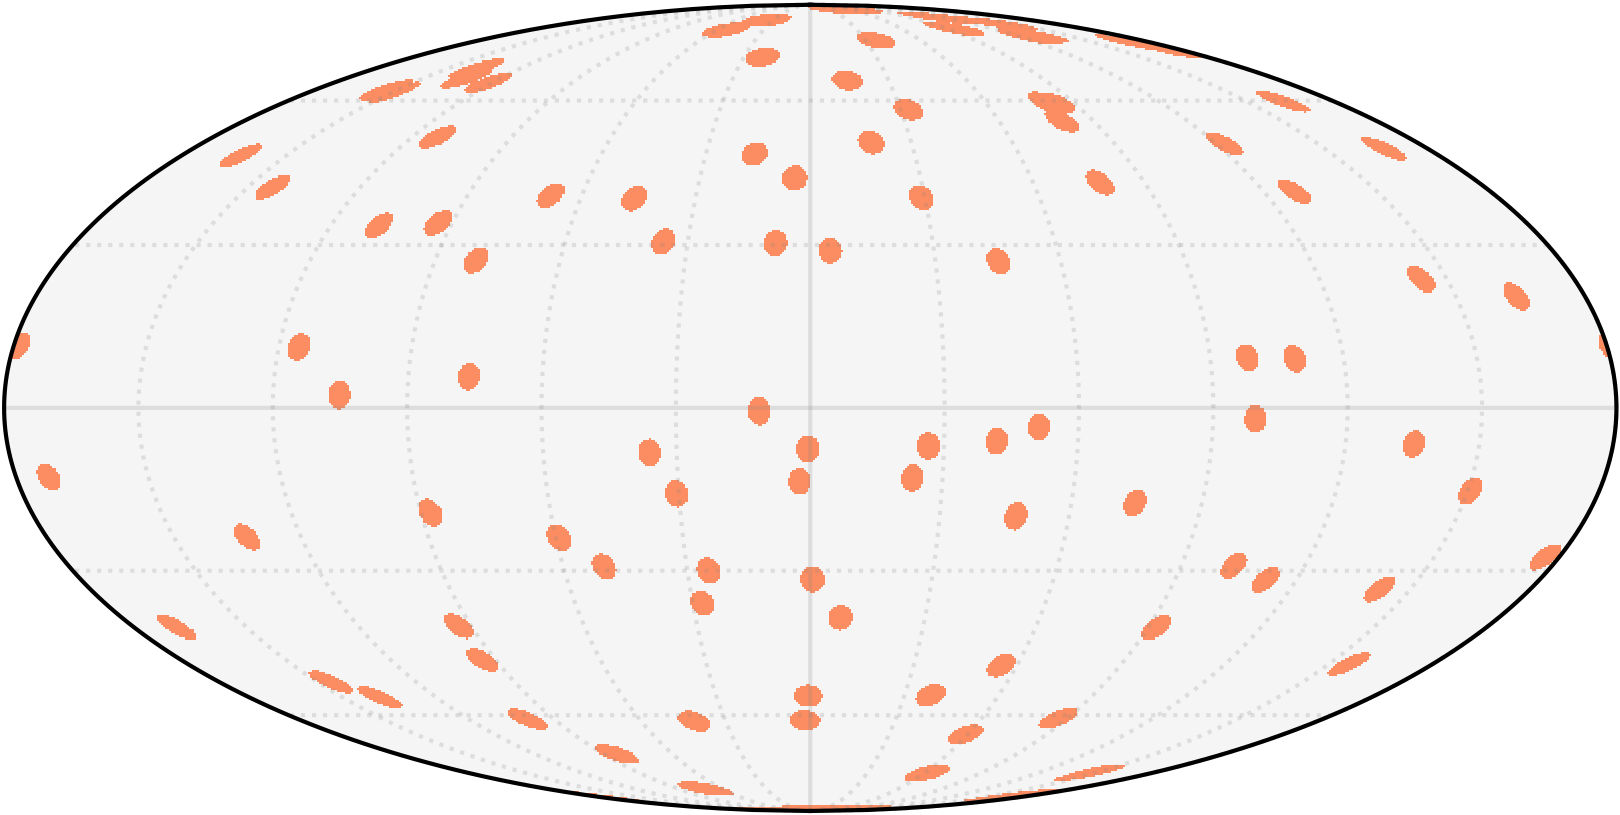

In [245]:
# visualizing the 100 patches for low redshift

fig, ax = plt.subplots(figsize=set_size(), dpi=300)

hp.mollview(P25_map, title="",
            fig=fig, sub=(1,1,1), cmap=cmap_healpy, cbar=False)
hp.graticule(alpha=0.2, color="grey")
ax.axis("off")
plt.savefig("./figures/P25_100_random_patches.svg")

- Compute the mean and standard deviation of the correlations over all these 100 patches. Use np.mean and np.std.

- Plot the individual 100 2PCFs in grey and their mean in red with the standard deviation as the error bars. Use plt.errorbar()

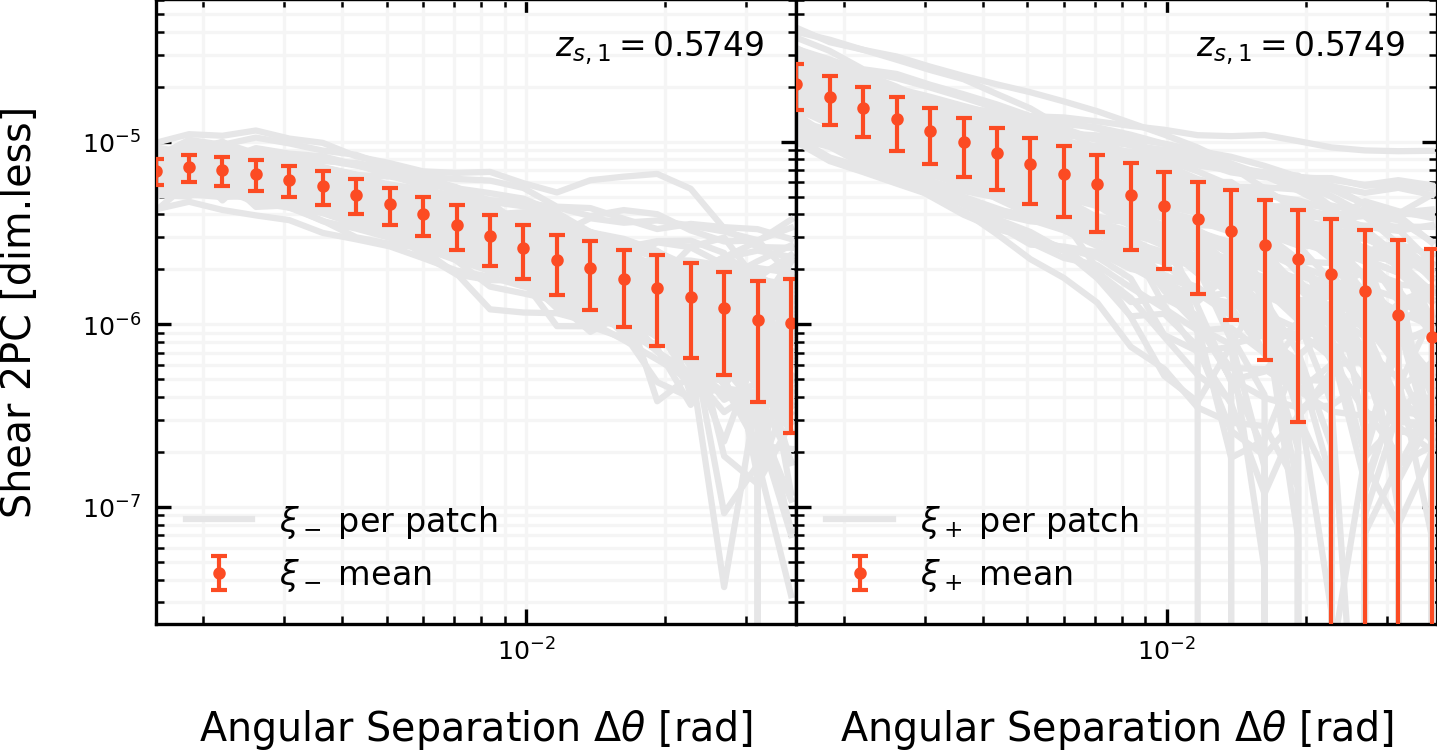

In [260]:
xim_means, xip_means, xim_stds, xip_stds = [], [], [], []
xim_array = xim_array_p25
xip_array = xip_array_p25
bins = bins_p25

for i in range(0,20):
    curr_xims = [j[i] for j in xim_array]
    curr_xips = [j[i] for j in xip_array]
    xim_means.append(np.mean(curr_xims))
    xip_means.append(np.mean(curr_xips))
    xim_stds.append(np.std(curr_xims))
    xip_stds.append(np.std(curr_xips))

# and plotting it!
fig, axs = plt.subplots(ncols=2, figsize=(set_size(height_factor=0.5)),
                        sharey=True, dpi=300)

for i, (xip, xim) in enumerate(zip(xip_array, xim_array)):
    if i==0:
        axs[0].loglog(bins, xim, color="#E6E6E7",
                      label=r"$\xi_-$ per patch")
        axs[1].loglog(bins, xip, color="#E6E6E7",
                      label=r"$\xi_+$ per patch")

    else:
        axs[0].loglog(bins, xim, color="#E6E6E7")
        axs[1].loglog(bins, xip, color="#E6E6E7")

axs[0].errorbar(x=bins, y=xim_means, yerr=xim_stds, color="#FC4B23",
                zorder=10, label=r"$\xi_-$ mean", capsize=2, fmt="o",
                markersize=2, elinewidth=1, capthick=1)
axs[1].errorbar(x=bins, y=xip_means, yerr=xip_stds, color="#FC4B23",
                zorder=10, label=r"$\xi_+$ mean", capsize=2, fmt="o",
                markersize=2, elinewidth=1, capthick=1)

axs[0].legend(fontsize=8, loc="lower left")
axs[1].legend(fontsize=8, loc="lower left")
axs[0].set_xlim(bins[0], bins[-1]+0.001)
axs[1].set_xlim(bins[0], bins[-1]+0.001)
axs[0].set_xlabel(r"Angular Separation $\Delta\theta$ [rad]", fontsize=9.5)
axs[1].set_xlabel(r"Angular Separation $\Delta\theta$ [rad]", fontsize=9.5)
axs[0].set_ylabel(r"Shear 2PC [dim.less]", fontsize=9.5)

axs[0].set_title(r"$z_{s,1}=0.5749$", loc="right", x=0.95, y=0.87)
axs[1].set_title(r"$z_{s,1}=0.5749$", loc="right", x=0.95, y=0.87)

plt.subplots_adjust(wspace=0)
plt.savefig("./figures/P25_2pcf_averages.svg")
plt.show()

# P2.6: Computing the average shear 2PCFs in several patches in the $z_{s,2}$ map

In this exercise you will compute the shear 2PCFs within multiple patches in the $z_{s,2}$ map

- Repeat P2.5 for the $z_{s,2}$ map

In [248]:
P26_map = np.copy(gamma1_z1)

# slightly changed because we need the curr_circ as_well
def subtract_circular_patch(curr_map, theta, phi, return_circ=True):
    cen_unit_vec = hp.ang2vec(theta, phi)
    curr_circ = hp.query_disc(2**11, vec=cen_unit_vec,
                              radius = np.radians(2.5))
    curr_map[curr_circ] = 1
    if return_circ:
        return curr_map, curr_circ
    return curr_map

def pixel2RaDec(pixel_indices, NSIDE):
    theta, phi = hp.pixelfunc.pix2ang(NSIDE, pixel_indices, nest=False)
    ra = phi
    dec = np.pi/2.0-theta
    return ra, dec

n_patches = 0
picked_phis, picked_thetas, xim_array_p26, xip_array_p26 = [], [], [], []
circ_indices = np.array([])
theta_cond, phi_cond = True, True

np.random.seed(9048934)

# we need 100 patches in total
while n_patches < 100:
    
    # random values we try out
    theta_try = np.random.uniform(0, np.pi)
    phi_try = np.random.uniform(0, 2*np.pi)

    # borders we have to check for theta
    theta_try_l = theta_try - np.radians(2.5)
    if theta_try_l < 0:
        theta_try_l += np.pi
    theta_try_h = theta_try + np.radians(2.5)
    if theta_try_h > np.pi:
        theta_try_h -= np.pi

    # borders we have to check for phi
    phi_try_l = phi_try - np.radians(2.5)
    if phi_try_l < 0:
        phi_try_l += 2*np.pi
    phi_try_h = phi_try + np.radians(2.5)
    if phi_try_h > 2*np.pi:
        phi_try_h -= 2*np.pi

    # do these values overlap with already picked ones?
    phi_cond = not(any(
        (theta_try_l <= i <= theta_try_h) for i in picked_thetas
    ))
    theta_cond = not(any(
        (phi_try_l <= i <= phi_try_h) for i in picked_phis
    ))

    # if not, then add them to the map and n_patches += 1
    if theta_cond or phi_cond:
        # update the lists of used values
        picked_thetas.append(theta_try)
        picked_phis.append(phi_try)
        # update the map and get the current indices
        P26_map, curr_circ = subtract_circular_patch(curr_map=P26_map,
                                                     theta=theta_try,
                                                     phi=phi_try,
                                                     return_circ=True)
        # add the current ra and dec to the array        
        curr_ra_dec = [pixel2RaDec(i, 2**11) for i in curr_circ]
        ra_array = [value[0] for value in curr_ra_dec]
        dec_array = [value[1] for value in curr_ra_dec]
        # gamma values only for the selected patches
        curr_gamma1_z2 = gamma1_z2[curr_circ]
        curr_gamma2_z2 = gamma2_z2[curr_circ]
        # make cata!
        cata = treecorr.Catalog(
            ra=ra_array, dec=dec_array, g1=curr_gamma1_z2,
            g2=curr_gamma2_z2, flip_g1=True, ra_units="rad",
            dec_units="rad")
        # process!
        # scaling the values to arcminutes to have right units
        minimum = 5 * (np.pi / 180 / 60)
        maximum = 140 * (np.pi / 180 / 60)

        ggcorr = treecorr.GGCorrelation(nbins=20, min_sep=minimum, 
                                        max_sep=maximum)
        ggcorr.process(cata)
        xip_array_p26.append(ggcorr.xip)
        xim_array_p26.append(ggcorr.xim)
        # update the number of patches
        n_patches += 1
    else:
        continue

bins_p26 = ggcorr.rnom

0.0 180.0 -180.0 180.0


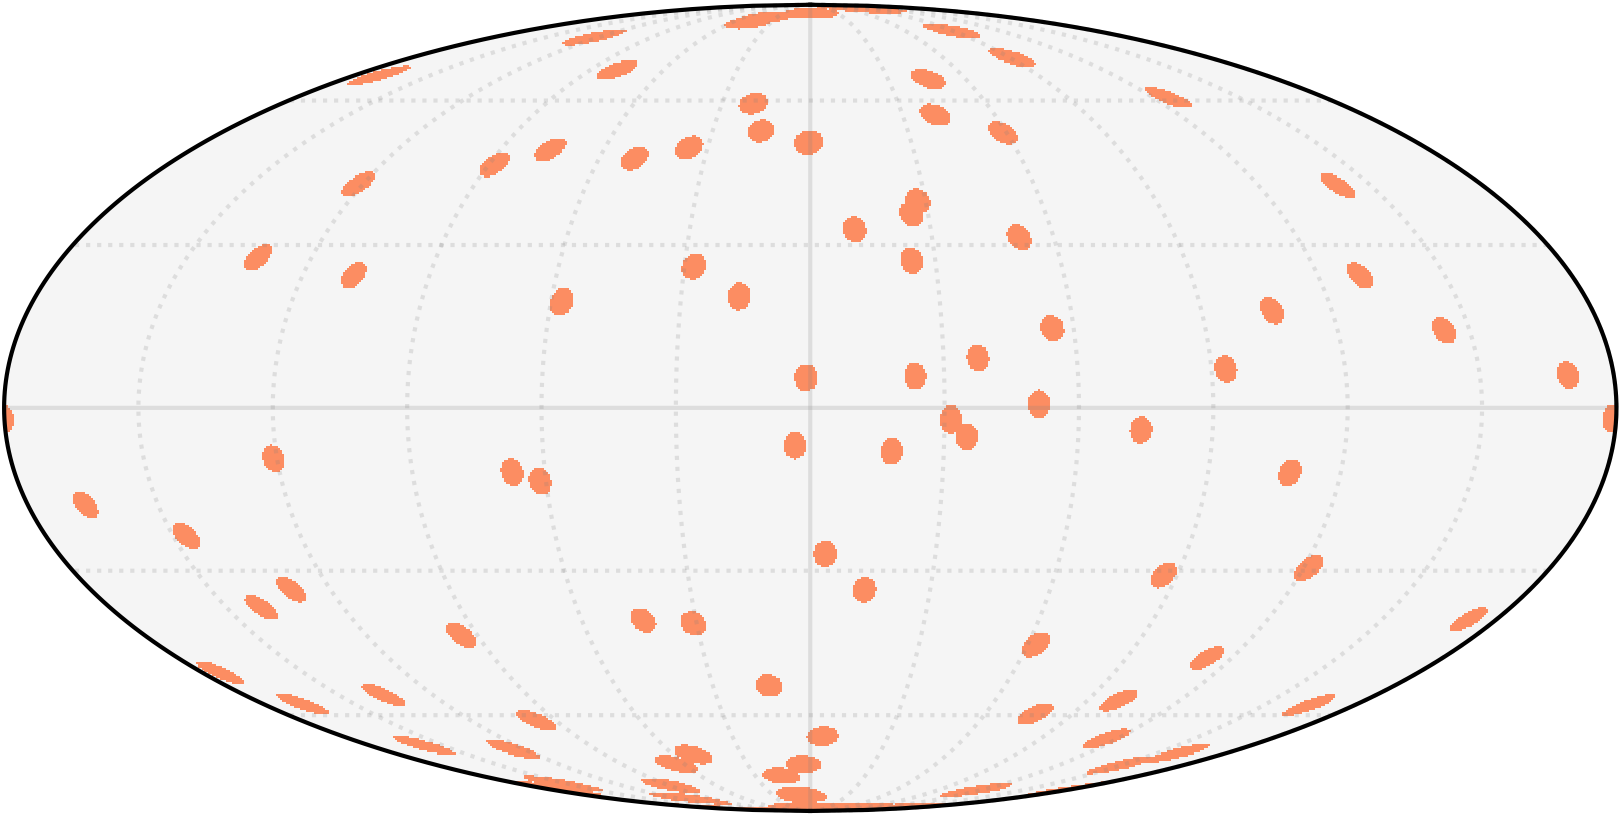

In [249]:
# visualizing the 100 patches for low redshift

fig, ax = plt.subplots(figsize=set_size(), dpi=300)

hp.mollview(P26_map, title="",
            fig=fig, sub=(1,1,1), cmap=cmap_healpy, cbar=False)
hp.graticule(alpha=0.2, color="grey")
ax.axis("off")
plt.savefig("./figures/P26_100_random_patches.svg")

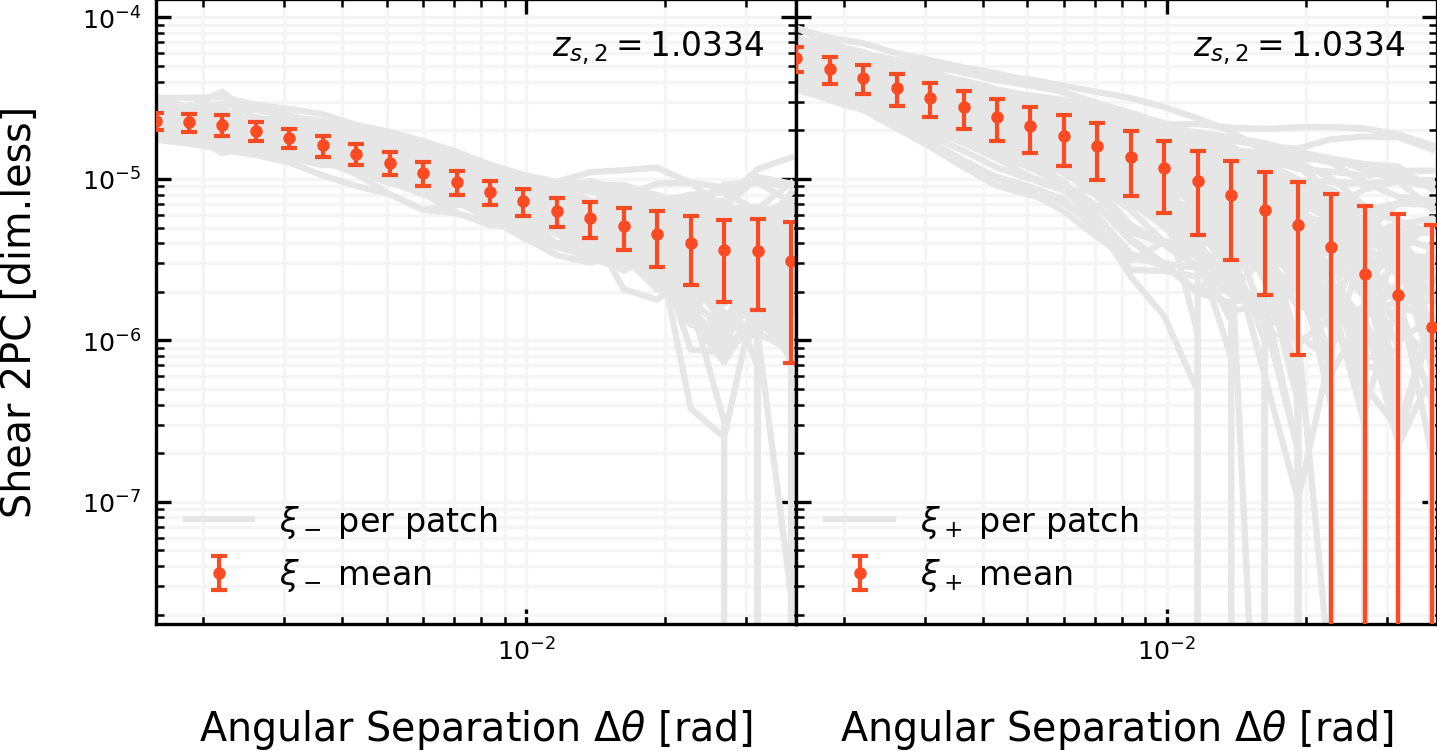

In [261]:
xim_means, xip_means, xim_stds, xip_stds = [], [], [], []
xim_array = xim_array_p26
xip_array = xip_array_p26
bins = bins_p26

for i in range(0,20):
    curr_xims = [j[i] for j in xim_array]
    curr_xips = [j[i] for j in xip_array]
    xim_means.append(np.mean(curr_xims))
    xip_means.append(np.mean(curr_xips))
    xim_stds.append(np.std(curr_xims))
    xip_stds.append(np.std(curr_xips))

# and plotting it!
fig, axs = plt.subplots(ncols=2, figsize=(set_size(height_factor=0.5)),
                        sharey=True, dpi=300)

for i, (xip, xim) in enumerate(zip(xip_array, xim_array)):
    if i==0:
        axs[0].loglog(bins, xim, color="#E6E6E7",
                      label=r"$\xi_-$ per patch")
        axs[1].loglog(bins, xip, color="#E6E6E7",
                      label=r"$\xi_+$ per patch")

    else:
        axs[0].loglog(bins, xim, color="#E6E6E7")
        axs[1].loglog(bins, xip, color="#E6E6E7")

axs[0].errorbar(x=bins, y=xim_means, yerr=xim_stds, color="#FC4B23",
                zorder=10, label=r"$\xi_-$ mean", capsize=2, fmt="o",
                markersize=2, elinewidth=1, capthick=1)
axs[1].errorbar(x=bins, y=xip_means, yerr=xip_stds, color="#FC4B23",
                zorder=10, label=r"$\xi_+$ mean", capsize=2, fmt="o",
                markersize=2, elinewidth=1, capthick=1)

axs[0].legend(fontsize=8, loc="lower left")
axs[1].legend(fontsize=8, loc="lower left")
axs[0].set_xlim(bins[0], bins[-1]+0.001)
axs[1].set_xlim(bins[0], bins[-1]+0.001)
axs[0].set_xlabel(r"Angular Separation $\Delta\theta$ [rad]", fontsize=9.5)
axs[1].set_xlabel(r"Angular Separation $\Delta\theta$ [rad]", fontsize=9.5)
axs[0].set_ylabel(r"Shear 2PC [dim.less]", fontsize=9.5)

axs[0].set_title(r"$z_{s,2}=1.0334$", loc="right", x=0.95, y=0.87)
axs[1].set_title(r"$z_{s,2}=1.0334$", loc="right", x=0.95, y=0.87)

plt.subplots_adjust(wspace=0)
plt.savefig("./figures/P26_2pcf_averages.svg")
plt.show()

# P2.7: Comparing theory calculations of the shear 2PCFs against the measurements from the simulation

Load and plot the theoretical curves for $z_{s,1}$ and $z_{s,2}$ (that you computed on the first day in P1.7) together with the average of the measurements from the Takahashi simulations (that you computed in P2.5 and P2.6). Compare the theoretical curves to your measurements and see whether they agree or not.

In [ ]:
# Write your code here. Add more coding cells as needed.